# Mnist Classification

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
nb_classes = 10
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate= 0.1).minimize(cost)

is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# argmax returns maximum value in vector with a given axis (which is vertical on this example)
# eqaul returns truth value between vectors (such as [1, 1, 1, 0])
# cast change the data type of given vector
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict = {X:batch_xs, Y:batch_ys})
            avg_cost += c / total_batch
            
        print('Epoch: ', '%04d' % (epoch +1), 'cost = ', '{:.9f}'.format(avg_cost))
    print("Accuracy: ", accuracy.eval(session = sess, feed_dict={X: mnist.test.images, Y:mnist.test.labels}))

Epoch:  0001 cost =  2.635691047
Epoch:  0002 cost =  1.115310299
Epoch:  0003 cost =  0.904036193
Epoch:  0004 cost =  0.794417774
Epoch:  0005 cost =  0.724063025
Epoch:  0006 cost =  0.673025521
Epoch:  0007 cost =  0.634121235
Epoch:  0008 cost =  0.603063821
Epoch:  0009 cost =  0.577052941
Epoch:  0010 cost =  0.555368719
Epoch:  0011 cost =  0.536470019
Epoch:  0012 cost =  0.520084024
Epoch:  0013 cost =  0.505731085
Epoch:  0014 cost =  0.492687780
Epoch:  0015 cost =  0.481597160
Accuracy:  0.8916


In [14]:
import matplotlib.pyplot as plt
import random

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer], feed_dict = {X:batch_xs, Y:batch_ys})
        avg_cost += c / total_batch

    print('Epoch: ', '%04d' % (epoch +1), 'cost = ', '{:.9f}'.format(avg_cost))
print("Accuracy: ", accuracy.eval(session = sess, feed_dict={X: mnist.test.images, Y:mnist.test.labels}))

Epoch:  0001 cost =  2.818146288
Epoch:  0002 cost =  1.081424054
Epoch:  0003 cost =  0.860338550
Epoch:  0004 cost =  0.754335706
Epoch:  0005 cost =  0.686959520
Epoch:  0006 cost =  0.639152313
Epoch:  0007 cost =  0.602278150
Epoch:  0008 cost =  0.573381161
Epoch:  0009 cost =  0.548921620
Epoch:  0010 cost =  0.528789485
Epoch:  0011 cost =  0.511272956
Epoch:  0012 cost =  0.496348874
Epoch:  0013 cost =  0.482992374
Epoch:  0014 cost =  0.470672249
Epoch:  0015 cost =  0.460269619
Accuracy:  0.888


Label:  [3]
Prediction:  [3]


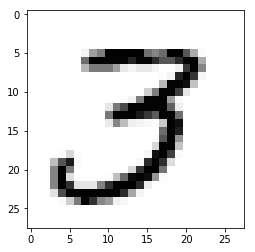

In [16]:
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X:mnist.test.images[r:r+1]}))

plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap="Greys", interpolation="nearest")
plt.show()